#  レコメンデーション応用


- **[1.1 概要](#1.1-概要)**
    - **[1.1.1 検索エンジン作成の手順](#1.1.1-検索エンジン作成の手順)**
    - **[1.1.2 Webページの情報を入手する。](#1.1.2-Webページの情報を入手する。)**
    - **[1.1.3 htmlのタグ情報の取得する。](#1.1.3-htmlのタグ情報の取得する。)**
    - **[1.1.4 タグの属性の取得する。](#1.1.4-タグの属性の取得する。)**
    - **[1.1.5 クローラーを作成する。](#1.1.5-クローラーを作成する。)**
<br><br>
- **[1.2 SQLの使い方を学ぶ](#1.2-SQLの使い方を学ぶ)**
    - **[1.2.1 SQLの概要](#1.2.1-SQLの概要)**
    - **[1.2.2 テーブルの作成と値の代入](#1.2.2-テーブルの作成と値の代入)**
    - **[1.2.3 テーブルからデータを取り出す。](#1.2.3-テーブルからデータを取り出す。)**
    - **[1.2.4 検索エンジン作成に必要なテーブルを作成する。](#1.2.4-検索エンジン作成に必要なテーブルを作成する。)**
<br><br>
- **[1.3 文章を単語に分ける。](#1.3-文章を単語に分ける。)**
    - **[1.3.1 htmlから文章のみを抽出する。](#1.3.1-htmlから文章のみを抽出する。)**
    - **[1.3.2 正規表現](#1.3.2-正規表現)**
    - **[1.3.3 正規表現でコンパイルする。](#1.3.3-正規表現でコンパイルする。)**
<br><br>
- **[1.5 添削問題](#1.5-添削問題)**

***

## 1.1 概要

### 1.1.1 検索エンジン作成の手順

レコメンデーションの発展では３章かけて検索エンジンを作成していきます。   
検索エンジンはページに含まれる単語や単語の位置から検索したい内容に最も適したものをレコメンドするシステムです。   
最も有名なものに私たちがほぼ毎日使っているであろうGoogleの検索フォームがあります。    
実装方法としては文章からすべての単語を抜き出し、抜き出したものをキーとして検索をする転置インデックスと呼ばれる方式をとります。   
レコメンデーションにおける分類としては、今回はページの情報のみを利用するのでコンテンツベースになります。


レコメンデーション応用では検索用のデータをスクレイピングにより入手するところから、最も推薦度の高いURLを示すところまで実装します。 
検索エンジン制作の大まかな流れは次のようになっています。   

1. Webページよりデータを入手して、データセットを作成する。   
2. データセットをsqlを用いてデータベースに保存する。
3. データベースから検索した単語に適応するサイトのURLを表示できるようにする。   
4. 表示の優先順位をデータから分析する。
5. 推薦度の高いURLを表示する。

このコンテンツでは   
- スクレイピングの方法
- データベースの一つであるSQLの使い方
- クラスの使い方
- 正規表現の使い方

も必要な知識として学びます。

#### 問題

- 次のうち間違っているものはどれでしょう？


1. 検索エンジンの優先順位を決めるアルゴリズムは何度も改良されてきた。
2. すべての検索エンジンはコンテンツベースである。
3. 検索エンジンは個人で作ることが可能である。

#### ヒント

- Googleでは2003年ごろから検索エンジンに様々なアップグレードをしてきました。
- 一般に人気のあるWEBページは上に表示されます。

#### 解答

すべての検索エンジンはコンテンツベースである。

***

### 1.1.2 Webページの情報を入手する。

検索する対象となるWebサイトのデータをデータスクレイピングにより取得します。   
プログラムがインターネット上のリンクを辿ってWebサイトを巡回し、Webページ上の情報を保存することをクローリングといいます。   
今回検索エンジンを作るにあたって、クローリングするための手順は、   
1. 出発点となるURLをあらかじめプログラムに入力しておく。   
2. 出発点のURLに貼られているリンクから新しくURLの情報を入手する。   
3. 2.で入手したURLを重複なくまとめ、順番にWEBページの文章をスクレイピングしていく。   

となります。   

ここではスクレイピングの方法をおさらいしましょう。   

スクレイピングには、   
- urllib   
- BeautifulSoup   

というモジュールを使用します。   
urllibはURLからWEBページのhtmlを取得するためのライブラリであり、BeautifulSoupはurllibにより取得した情報を操作するためのものです。   
スクレイピングした情報は基本的にBeautifulSoupの型であるbs4.BeautifulSoupクラスを用いて操作します。

```python
import urllib.request
from bs4 import BeautifulSoup

html = urllib.request.urlopen("スクレイピングしたいurl")
soup = BeautifulSoup(html, "html.parser")

print(soup.text)
```

とすることによってスクレイピングしたページの本文を入手することができます。   
コードに新しく出てきたメソッドがあるので紹介します。   
- urlopen  :    
URLからWebページのhtmlを取得します。


- BeautifulSoup :    
htmlをbs4.BeautifulSoupクラスに変換します。第二引数にはパーサを設定します。   
パーサとはデータをプログラムで操作できるようなデータ構造に変換するための処理をする部分のことで、htmlでは通常 html.parser が利用されます。




#### 問題

- 次のURLはwikipediaにおけるpythonのページのURLです。
- 次のURLにアクセスして、本文をスクレイピングしてください。

In [ ]:
# 必要なライブラリをimportしてください。

url = "https://ja.wikipedia.org/wiki/Python"

# 本文を出力してください。


print(soup.text)

#### ヒント

- htmlの取得にはurllib.request.urlopen()を使いましょう。

#### 解答例

In [ ]:
# 必要なライブラリをimportしてください。
import urllib.request
from bs4 import BeautifulSoup

url = "https://ja.wikipedia.org/wiki/Python"

# 本文を出力してください。
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html, "html.parser")

print(soup.text)

***

### 1.1.3 htmlのタグ情報の取得する。

スクレイピングするにあたってhtmlの構造をすこし学びましょう。   


htmlをスクレイピングするさいタグというものが大切になります。   
タグはWebページの情報がどのような性質を持っているかを表します。   
例えば、aのタグには他のURLへのリンクとリンクするための文章が入っています。   
divのタグには段落にされた文章やaタグなどのまとまりが入っています。  
このほかにもタグはたくさんあるので実際に自分でスクレイピングがしてみたい！と思った時などは調べてみてください。   

BeautifulSoupではこのタグを指定してデータを取得することができます。   

aタグの情報を入手するコードは以下のようになります。   
```python
import urllib.request
from bs4 import BeautifulSoup

html = urllib.request.urlopen("スクレイピングしたいurl")
soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a')

for link in links:
    print(link)
```
タグの情報を入手するためのメソッドとしては以下のものが使えます。   
- find_all() :   
指定したタグすべての内容を取得します。取得した情報はリストの形で保存されます。    
- find() :   
指定したタグで最も初めのものの内容を取得します。   

#### 問題

- 以下のURLからリンクの情報を取得してください。   

In [ ]:
import urllib.request
from bs4 import BeautifulSoup

url = "https://ja.wikipedia.org/wiki/Python"
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html, "html.parser")

# aタグの情報を入手して表示してください。



#### ヒント

- aタグの情報を入手するには.find_all()が使えます。
- .find_all()で入手した内容はリストの形になっているので表示するときはfor文を使いましょう。

#### 解答例

In [ ]:
import urllib.request
from bs4 import BeautifulSoup

url = "https://ja.wikipedia.org/wiki/Python"
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html, "html.parser")

# aタグの情報を入手して表示してください。
links = soup.find_all('a')
for link in links:
    print(link)

***

### 1.1.4 タグの属性の取得する。

タグの中には様々な情報が含まれています。   
aタグの情報を見てみると、<br>
```python
<a class="image new" href="https://www.********" title="サンプルタイトル"></a>
```
このような class や href を属性といいます。  
属性にもそれぞれ意味がありhrefにはリンクが代入されています。   
 **[1.1.3](#1.1.3-htmlのタグ情報の取得する。)**のようにスクレイピングするとき属性も指定することによってより細かくデータを取得できます。   
```python
# 取得したデータから特定の属性を入手したいとき
print(link['href'])
print()
# 取得したデータからすべての属性を入手したいとき
print(link.attrs)
```
出力   
```
https://www.********

{'href': 'https://www.********', 'class': ['image', 'new'], 'title': 'サンプルタイトル'}
```   

実際にWebページから抜き出したい情報を探しタグ・属性を調べたいときは調べたい項目の上で右クリックをして検証をクリックすることでその文章のhtmlの情報をみることができます。

#### 問題

- URLからhrefが設定されているaタグを抜き出して、リンクをリストにして表示してください。

In [ ]:
import urllib.request
from bs4 import BeautifulSoup

url = "https://ja.wikipedia.org/wiki/Python"
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html, "html.parser")
# 以下を埋めてリンクをリストにして表示してください。



#### ヒント

- href にはリンクが入っています。

#### 解答例

In [ ]:
import urllib.request
from bs4 import BeautifulSoup

url = "https://ja.wikipedia.org/wiki/Python"
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html, "html.parser")

# 以下を埋めてリンクをリストにして表示してください。
links = soup.find_all('a')
link_list = []
for link in links:
    if 'href' in link.attrs :
        link_list.append(link['href'])

print(link_list)

***

### 1.1.5 クローラーを作成する。

クローラーを作成する手順は、   
1. 出発点となるURLをあらかじめプログラムに入力しておく。   
2. 出発点のURLに貼られているリンクから新しくURLの情報を入手する。   
3. 2.で入手したURLを重複なくまとめ、順番にWEBページの文章をスクレイピングしていく。   

この手順に従ってクローラーを作成してみましょう。   
<br>
クローラーを作成する前にURLについて少し学びましょう。   
URLには相対URLと絶対URLがあります。   
相対URLとは完全なURLではなく、そのWEBページの情報を利用したURL(元のページの情報を表すURLを基底URLといいます。)です。そのため相対URLはすべての情報がそろっているわけではありません。   
絶対URLとは今どこにいるかは関係ない、完成されたURLです。   

相対URLを絶対URLにするためにはurllib.parse.urljoin()を使いましょう。   
urllib.parse.urljoin(元になるurl,相対url)で基底URLから相対URLlに足りない情報を補完して絶対URLを作成することができます。   
<br>
URLには#がつくことがあります。   
これをアンカーリンクといいます。   
URLは基本的にページの先頭にリンクしますがアンカーリンクを設定することでページの好きな位置にアクセスすることができます。   


#### 問題

- クローラー作成の手順を参考にして、クローラーを作成しましょう。   
- 初めのURLからそこでリンクされているURLを入手してください。
- 入手したURLにアクセスし、そこでリンクされているURLも入手してください。   
- 入手したURLはすべてpages_listにまとめてください。

In [ ]:
import urllib.request
from bs4 import BeautifulSoup


def crawl(pages,depth=2):
    for i in range(depth):
        # newpagesを初期化してください。
        newpages = 
        pages_list = pages
        for page in pages:
            print(page)
            count = 0
            # 確認のため入手したpageを出力します。実装には必要ないです。
            try:
                html = urllib.request.urlopen(page)
            except:
                print('こちらのURLは開けませんでした : %s' % page)
                continue
            # aタグの情報のリストをlinksにいれてください。
            
            
            for count,link in enumerate(links):
                if ('href' in link.attrs):
                    # 相対URLを絶対URLに変換してください。
                    
                    # アンカーリンクを取り除いてください。
                    
                    # この先のSQLを学ぶ関係でURLに'のつくものは追加できません。ここで取り除きます。
                    if url.find("'") != -1:
                                continue
                    # 先頭がhttpであり、まだ追加されていないもののみを追加します。
                    if url[0:4] == 'http' and not url in (pages_list):
                        newpages.add(url)
                    # 時間がかかってしまうので追加するurlははじめの10個に制限します。
                    if count > 10:
                        break
            #　pagesを更新してください。
            
            pages_list = pages_list | pages
    return pages_list
            
url = {'https://ja.wikipedia.org/wiki/Python'}
pages_list = crawl(url)
print(pages_list)

#### ヒント

- depthはURLをどこまで深く探索するかということになります。
- tryの中でエラーが出た場合、実行終了にはならずexceptにとびます。
- アンカーリンクの場合アンカーの直前までがそのWEBページのURLになります。
- SQL文の関係で ' は取り除いてください。詳しい説明は2.1.2にてします。

#### 解答例

In [ ]:
import urllib.request
from bs4 import BeautifulSoup


def crawl(pages,depth=2):
    for i in range(depth):
        # newpagesを初期化してください。
        newpages = set()
        pages_list = pages
        for page in pages:
            print(page)
            count = 0
            # 確認のため入手したpageを出力します。実装には必要ないです。
            try:
                html = urllib.request.urlopen(page)
            except:
                print('こちらのURLは開けませんでした : %s' % page)
                continue
            # aタグの情報のリストをlinksにいれてください。
            soup = BeautifulSoup(html, "html.parser")
            links = soup.find_all('a')
            for link in links:
                if ('href' in link.attrs):
                    # 相対URLを絶対URLに変換してください。
                    url = urllib.parse.urljoin(page, link['href'])
                    # アンカーリンクを取り除いてください。
                    url = url.split('#')[0]
                    # 'のつくものを取り除いています。
                    if url.find("'") != -1:
                                continue
                    # 先頭がhttpであり、まだ追加されていないもののみを追加します。
                    if url[0:4] == 'http' and not url in (pages_list):
                        newpages.add(url)
                    count += 1
                    if count > 10:
                        break
            #　pagesを更新してください。
            pages = newpages
            pages_list = pages_list | pages
    return pages_list
            
url = {'https://ja.wikipedia.org/wiki/Python'}
pages_list = crawl(url)
print(pages_list)

***

## 1.2 SQLの使い方を学ぶ

### 1.2.1 SQLの概要

SQLとはデータを管理するデータベース言語のひとつです。   
SQLを使うことによって処理したデータの保存・出力が簡単にできます。  
分析しやすくするため、スクレイピングした結果をデータベースに保存しましょう。

今回はpythonでも使用できるsqlite3を利用します。   

SQLではデータを一括でまとめたものをデータベースと呼びます。   
データベースの中でそれぞれのデータを保存していくものをテーブルといいます。   

データベースとテーブルの関係は次の図のようなものです。
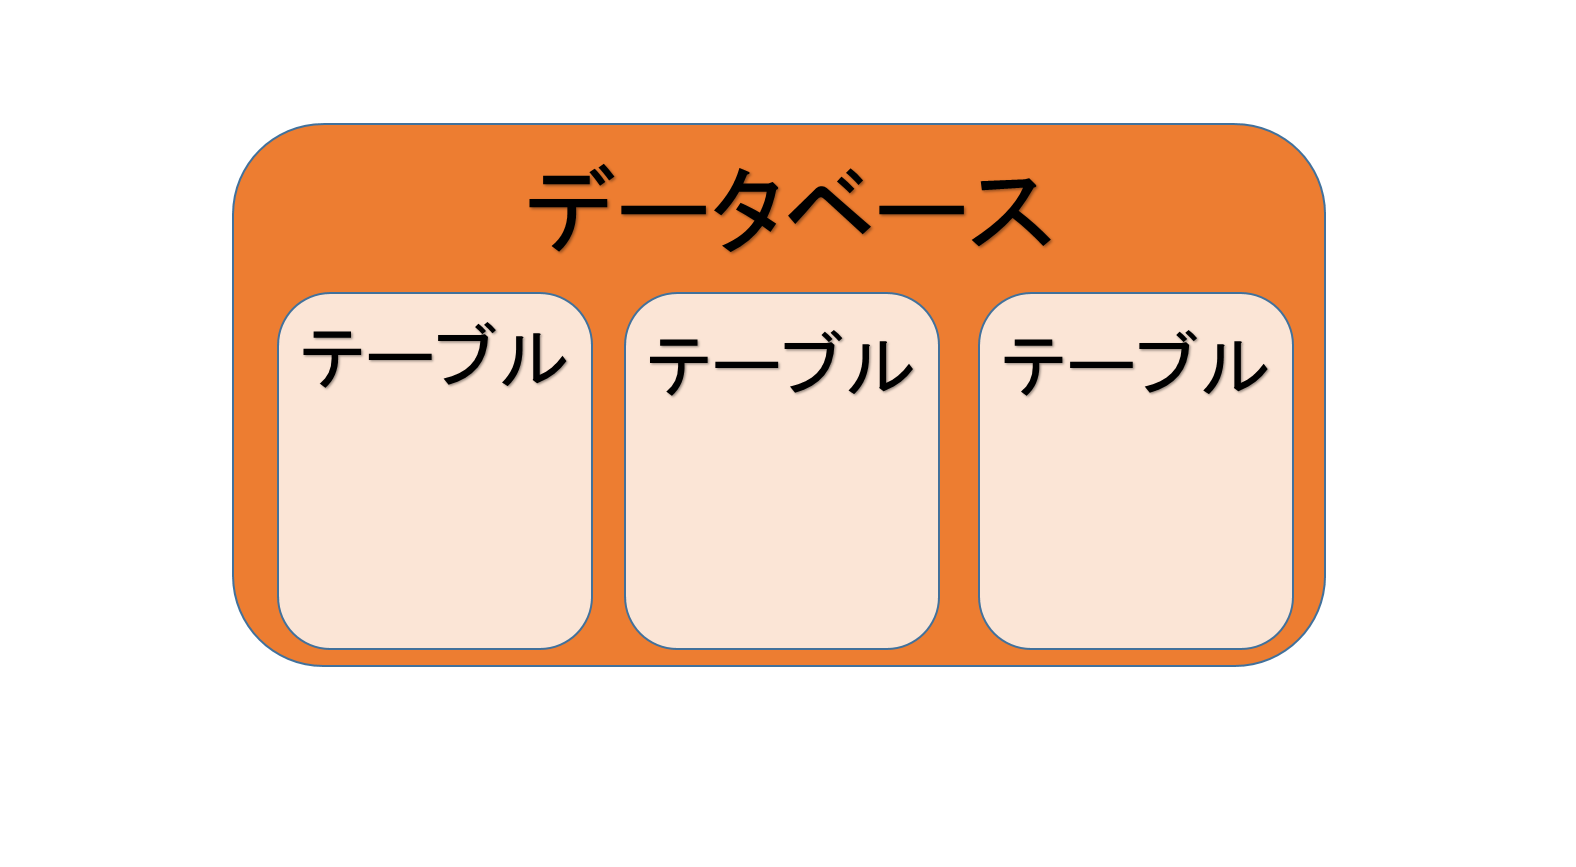


実際にpythonを使ってSQLのデータベースを操作する流れは次のようになります。     

1. データベースを作成する。
2. pythonをデータベースにつなげる。
3. SQLでテーブルを作成する。
4. テーブルにデータを入れる。
5. テーブルからデータを取り出す。   
<br>

1 データベースの作成の方法について説明します。  
```python
# データベースの名前をtest.dbとします。
dbname = "test.db"
# データベースをつなげて,connを通じて操作できるようにします。
conn = sqlite3.connect(dbname)
```
conn = sqlite3.connect(データベース名)とすることによって、データベースが存在していなければデータベースを作成し conn を操作することによって操作できるようになります。もともとデータベースが存在していればそのままつなげます。connの・ようなものをコネクションとよびます。   
例では拡張子を.dbとしましたが、拡張子に決まりはなく好きなものをつけることができます。   

プログラムを終了するときにはデータベースとの接続は閉じるようにしましょう。
```python
# つなげたデータベースを最後に閉じるにはclose()メソッドを使用します。
conn.close()
```

#### 問題

- sqlite3を用いてtest.dbという名前のデータベースを作成してください。

In [ ]:
# 必要なモジュールをimportしてください。


# コネクションを作成してください。


# コネクションを閉じてください。



#### ヒント

- sqlite3の3をつけ忘れないように注意しましょう。

#### 解答

In [ ]:
# 必要なモジュールをimportしてください。
import sqlite3

# コネクションを作成してください。
dbname = "test.db"
conn = sqlite3.connect(dbname)

# コネクションを閉じてください。
conn.close()

***

### 1.2.2 テーブルの作成と値の代入

SQLにはpythonとは別にSQL文というSQL用のプログラミング言語が存在します。    
pythonでSQLの操作をするときはこのSQL文をSQLに読み込ませて操作することになります。   
pythonからSQLにSQL文で命令を出すとき、executeメソッドを使用します。   

コネクション.execute(SQL文)

テーブルにはカラムがありそれぞれに値を代入することができます。   
最も基本的なSQL文である、テーブルの作成と値の代入を学びましょう。   


```python
# テーブルとカラムを作成します。   
conn.execute("create table テーブル名(カラム１,カラム２,...)")

# カラムに値を代入します。
conn.execute("insert into テーブル名 values(値１,値２,...)")

# 追加したデータを更新する。
conn.commit()

```
テーブルの作成と代入は上のようなSQL文で実行することができます。   
テーブルは一度作成してもう一度同じ名前で作成しようとするとエラーが出るので注意してください。   

SQLで値を追加・削除したときにはcommit()メソッドを呼び出して反映させます。commit()をしなければ反映できないので注意してください。    
<br><br>

```python
# テーブルの削除
conn.execute("drop table if exists テーブル名")
```
上のようにSQL文を実行するとテーブルを削除できます。   
同じ名前のテーブルをもう一度作成したい場合、一度削除してから作成してください。   
もちろん元のテーブルのデータは消えてしまうので注意してください。 <br>
if existsをつけることによってテーブルが存在する場合のみ削除することができます。

#### 問題

- test.dbにつなげてtestという名前でテーブルを作成してください。   
- testテーブルにa,b,cと３つのカラムを作成してください。
- a,b,cにそれぞれ値1,2,3を入れてください。
- 続けてa,b,cにそれぞれ値4,5,6を入れてください。

In [ ]:
import sqlite3

dbname = "test.db"
conn = sqlite3.connect(dbname)
# もしtestテーブルが作成されていれば削除しておきます。
# 二度目以降dropの部分をコメントアウトして実行するとエラーが出てテーブルが作成できなくなることを確認してください。
conn.execute("drop table test")

# テーブルを作成してください。

# 1,2,3と値を追加してください。

# 4,5,6と値を追加してください。

# データの反映を行ってください。


conn.close()

#### ヒント

- executeのSQL文は""でくくってください。''でも可能なのですが、あとの実装のことを考えて""で統一します。
- conn.commit()しないとデータは反映されません。

#### 解答例

In [ ]:
import sqlite3

dbname = "test.db"
conn = sqlite3.connect(dbname)
# もしtestテーブルが作成されていれば削除しておきます。
# 二度目以降dropの部分をコメントアウトして実行するとエラーが出てテーブルが作成できなくなることを確認してください。
conn.execute("drop table if exists test")

# テーブルを作成してください。
conn.execute("create table test(a,b,c)")
# 1,2,3と値を追加してください。
conn.execute("insert into test values(1,2,3)")
# 4,5,6と値を追加してください。
conn.execute("insert into test values(4,5,6)")
# データの反映を行ってください。
conn.commit()

conn.close()

***

### 1.2.3 テーブルからデータを取り出す。

テーブルからデータを取り出す方法について学びます。   
テーブルからデータを取り出すにはselectメソッドを使用します。
```python
# select にてテーブルから値を取り出す。
data = conn.execute("select カラム from テーブル名")
# selectにて取りだしたデータをリストにする。dataの型はSQLのものです。
data_list = data.fetchall()
print(data_list)
```

.fetchall()にてselectで該当するものをリストですべて抜き出します。   
同様な使い方のできるものとしてfetchone()があり、これは一番上の要素を一つ抜き出します。   

条件を選択してデータを抜き出したいときはwhereを用います。
```python 
# testテーブルでカラムaの値が4のものだけを抜き出したいとき。
data = conn.execute("select * from test where a = 4").fetchall()
```
すべてのカラムを選択したいとき * を使うことで選択できます。

#### 問題

- test.dbからカラムbの値が5の行のカラムa,cの値を抜き出して出力してください。
 

In [ ]:
import sqlite3

dbname = "test.db"
conn = sqlite3.connect(dbname)

#  値を抜き出してください。


conn.close()

#### ヒント

- データは一つなので.fetchall()、.fetchone()どちらでもつかえます。
- 一つ上でtest.dbの中に値を入れていないとうまく抜き出すことができません。うまく行かないときは1.2.2を実行してから行ってください。

#### 解答例

In [ ]:
import sqlite3

dbname = "test.db"
conn = sqlite3.connect(dbname)

#  値を抜き出してください。
data = conn.execute("select a, c from test where b = 5")
data_list = data.fetchall()
print(data_list)

conn.close()

***

### 1.2.4 検索エンジン作成に必要なテーブルを作成する。

今回の検索エンジンでは４つのテーブルを作成します。   
urllist、wordlist、wordlocation、link   
それぞれのテーブルには次のようなカラムを作成します。   

- urllist   
url : スクレイピングしたページのurlを保存する。   
- wordlist   
word : スクレイピングしたページ内の単語を保存する。   
- wordlocation   
url : wordのあったurlを保存する。   
word : wordを保存する。   
location : wordのあった位置を保存する。   
- link   
url_from : 参照したページのurlを保存する。   
url_to : 参照先のページのurlを保存する。   

wordlocation、linkは後ほどページの重みづけを行うときに使用します。   

テーブルにはもともとrowidというものがあります。   
pythonのindexのようなもので、値を代入した瞬間に割り振られます。   
rowidを確認するには、
```python
conn, execute("select rowid from test")
```
のようにrowidを指定すると受け取れます。

#### 問題

- 説明にあった4つのテーブルを作成してください。

In [ ]:
import sqlite3

def drop_all_table(conn):
    conn.execute("drop table if exists urllist")
    conn.execute("drop table if exists wordlist")
    conn.execute("drop table if exists wordlocation")
    conn.execute("drop table if exists link")
    
# 空欄を埋めてテーブルを作成する関数を完成させてください。
def create_table(conn):
    
    
    
dbname = 'test.db'
conn = sqlite3.connect(dbname)
drop_all_table(conn)
create_table(conn)
conn.close()

#### ヒント

- カラム名を間違えないように注意してください。

#### 解答例


In [ ]:
import sqlite3

def drop_all_table(conn):
    conn.execute("drop table if exists urllist")
    conn.execute("drop table if exists wordlist")
    conn.execute("drop table if exists wordlocation")
    conn.execute("drop table if exists link")
    
# 空欄を埋めてテーブルを作成する関数を完成させてください。
def create_table(conn):
    conn.execute("create table urllist(url)")
    conn.execute("create table wordlist(word)")
    conn.execute("create table wordlocation(url, word, location)")
    conn.execute("create table link(url_from, url_to)")


dbname = 'test.db'
conn = sqlite3.connect(dbname)
drop_all_table(conn)
create_table(conn)
conn.close()

***

## 1.3 文章を単語に分ける。

### 1.3.1 htmlから文章のみを抽出する。

BeautifulSoupよりスクレイピングしたデータから文章のみを抜き出していきます。      
bs4.BeautifulSoupクラスから本文を取り出すのは三つのメソッドがあります。   
1. .text :   
htmlの文章をすべてstr型で取得します。   
2. .string :   
htmlでタグの中の要素が一つのみであれば本文を取得、複数あった場合はNoneを返します。   
3. .contents :   
htmlで初めの要素は本文を取り出し、その後はタグ付きでリストにまとめます。

言葉だけの説明では少しわかりにくいと思うので、実際にhtmlから本文を読み込んでみて確認します。  

```python
from bs4 import BeautifulSoup
 
html_data ="""
<div>sample test</div>

<div>sample <b>text</b></div>

<div>sample <a href="https://sample_link">sample_link </a><b>test</b></div>
"""
soup = BeautifulSoup( html, "html.parser" )
 
divs = soup.findAll( "div" )
for div in divs:
    print( "----------------------------------")
    print( "元の要素: %s" % div )
    # textの出力
    print( "text: %s" % div.text )
    # stringの出力
    print( "string: %s" % div.string )
    # contentsの出力
    print( "contents: %s" % div.contents)
    
```
出力   
```python
----------------------------------
元の要素: <div>sample test</div>
text: sample test
string: sample test
contents: ['sample test']
----------------------------------
元の要素: <div>sample <b>text</b></div>
text: sample text
string: None
contents: ['sample ', <b>text</b>]
----------------------------------
元の要素: <div>sample <a href="https://sample_link">sample_link</a><b>test</b></div>
text: sample sample_link test
string: None
contents: ['sample ', <a href="https://sample_link">sample_link</a>, <b>test</b>]
```

< b>は文字列を 太字 にするという意味になります。

#### 問題

- 以下のurlから本文のみを出力してください。   

In [ ]:
import urllib.request
from bs4 import BeautifulSoup

url = "https://ja.wikipedia.org/wiki/Python"
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html, "html.parser")

# 本文のみを出力してください。


#### ヒント

- soupには様々なタグが含まれています。

#### 解答

In [ ]:
import urllib.request
from bs4 import BeautifulSoup

url = "https://ja.wikipedia.org/wiki/Python"
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html, "html.parser")

# 本文のみを出力してください。
print(soup.text)

***

### 1.3.2 正規表現

**[1.3.1](1.3.1-htmlから文章のみを抽出する。)**で入手したテキストから意味のある単語のみを抜き出してリストを作成します。   
日本語を単語で分けようとすると分かち書きという処理を行う必要があり複雑になるので、今回は簡単のため英語のページのみを対象にします。   
単語を抜き出すために正規表現をいう方法を使い、英数字以外で単語を区切るようにしましょう。   

正規表現とは、文字列をパターンを用いて表現するものです。   
例えば、aで始まりbで終わる文字列を探したり、aとcの間に一文字のみ入るような文字列を探したりなど文字列のパターンを探すことができます。   
いくつかの正規表現を紹介します。   
- \*　: 0文字以上の任意の文字
- .　:任意の1文字
- \d : 数字
- \w : 英数字
- \s : 空白文字

\* や　. などの文字をメタ文字、\　から始まる文字を特殊シーケンスといいます。   

正規表現は次のように使用することができます。   
```python
# 正規表現のライブラリのインポートする。
import re

# 文章を区切る。
words = re.split(区切り文字のパターン, 文章)

# 文章のどこかにパターンに当てはまるものがないか探す。
# なければNoneを返す。
judge = re.search(パターン, 文章)

# 例：数字を区切り文字に文章を区切る。
words = re.split("\d", 文章)

```

例では .searchメソッドと.splitメソッドの説明をしています。

#### 問題

- 文章から英数字以外の文字を区切り文字として、単語のリストを作成しましょう。
- 単語リストの文字はすべて小文字に変換しましょう。
- 一文字の言葉は意味がないのでリストからのぞきましょう。
- スクレイピングするサイトはpythonの英語版wikipediaです。

In [ ]:
import re
import urllib.request
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/Python_(programming_language)"
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html, "html.parser")

# text にスクレイピングした本文を代入してください。
text = 

# wordsに単語を代入してください。
words = 

print(words)


#### ヒント

- 英数字以外の正規表現は\Wです。
- words に単語を代入するさいはリスト内包表現を使うとやりやすいです。
- 小文字にするには.lower()メソッドを利用してください。

#### 解答例

In [ ]:
import re
import urllib.request
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/Python_(programming_language)"
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html, "html.parser")

# text にスクレイピングした本文を代入してください。
text = soup.text

# wordsに単語を代入してください。
words = [s.lower() for s in re.split("\W+", text) if len(s) > 2]
print(words)


***

### 1.3.3 正規表現でコンパイルする。

プログラミング言語から機械が理解できる言葉に変換することをコンパイルといいます。  
正規表現のパターンはコンパイルされて使われます。   
1.3.2では毎回パターンを読み込みコンパイルする必要がありました。   
そこで正規表現ではよく使うパターンは高速化のためあらかじめコンパイルして利用されます。   
正規表現のコンパイルには.compileメソッドが利用されます。   
コンパイル済みのパターンを用いて英数字以外を区切り文字として分割すると、   
```python
import re

pattern = re.compile(コンパイルしたいパターン)
words = pattern.split(文章)
```
となります。    

#### 問題

- 文章から英数字以外の文字を区切り文字として、単語のリストを作成しましょう。
- 単語リストの文字はすべて小文字に変換しましょう。
- 一文字の言葉は意味がないのでリストからのぞきましょう。
- 事前に文字列をコンパイルして高速化しましょう。

In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import re

# あらかじめコンパイルしたパターンを使用して、文章を単語に分ける関数を完成させてください。
def separate_word(soup):

    
    
    return words

url = "https://en.wikipedia.org/wiki/Python_(programming_language)"
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html, "html.parser")

# 単語を表示します。
words = separate_word(soup)
print(words)

#### ヒント

- あらかじめコンパイルしないときと.split()の使い方が少し違うことに注意してください。

#### 解答例

In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import re

# あらかじめコンパイルしたパターンを使用して、文章を単語に分ける関数を完成させてください。
def separate_word(soup):
    text = soup.text
    pattern = re.compile("\W")
    words = [s.lower() for s in pattern.split(text) if len(s) > 2]
    return words

url = "https://en.wikipedia.org/wiki/Python_(programming_language)"
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html, "html.parser")

# 単語を表示します。
words = separate_word(soup)
print(words)

***

##  添削問題

このchapterで学んだことを使って実装したクローラーよりクローリングします。

#### 問題 

- クローラーよりクローリングして、WEBページの内容を単語のリストにして出力してください
- 単語リストから頻出の単語を上から20個選択してリストにしてください。


In [ ]:
import numpy as np
# 足りないモジュールをimport してください。



def separate_word(soup):
    text = soup.text
    pattern = re.compile("\W")
    words = [s.lower() for s in pattern.split(text) if len(s) > 2]
    return words


def crawl(pages,depth=2):
    words_list = []
    for i in range(depth):
        newpages = set()
        pages_list = pages
        for page in pages:
            print(page)
            count = 0
            try:
                html = urllib.request.urlopen(page)
            except:
                print('こちらのURLは開けませんでした : %s' % page)
                continue
            soup = BeautifulSoup(html, "html.parser")
            words_list.append((page,separate_word(soup)))
            links = soup.find_all('a')
            for link in links:
                if ('href' in link.attrs):
                    url = urllib.parse.urljoin(page, link['href'])
                    url = url.split('#')[0]
                    if url.find("'") != -1:
                                continue
                    if url[0:4] == 'http' and not url in (pages_list):
                        newpages.add(url)
                    count += 1
                    if count > 10:
                        break
            pages = newpages
            pages_list = pages_list | pages
    return words_list


# urlは英語版wikipediaでpythonの検索結果です。
url = {"https://en.wikipedia.org/wiki/Python_(programming_language)"}
# URLから単語のリストを入手してください。


# 得られた単語をすべて一つのリストの要素としてまとめてください。


#単語の出現回数を数えてください。


# 単語を出現頻度の高いものからに並び替えてください。



#### ヒント

- 単語の出現回数を数えるのには辞書型を利用するのが便利です。
- リストにリストの要素のみを追加するには.extend()が便利です。リスト1.extend(リスト2)でリスト2の要素をリスト1に追加できます。
- 辞書型のソートにはsortedが使えます。sorted(辞書型.items(), key=lambda　x:-x[1])で昇べきの順で並び替えられます。

#### 解答例

In [ ]:
import numpy as np
# 足りないモジュールをimport してください。
import urllib.request
from bs4 import BeautifulSoup
import re
 
def separate_word(soup):
    text = soup.text
    pattern = re.compile("\W")
    words = [s.lower() for s in pattern.split(text) if len(s) > 2]
    return words


def crawl(pages,depth=2):
    words_list = []
    for i in range(depth):
        newpages = set()
        pages_list = pages
        for page in pages:
            #print(page)
            count = 0
            try:
                html = urllib.request.urlopen(page)
            except:
                print('こちらのURLは開けませんでした : %s' % page)
                continue
            soup = BeautifulSoup(html, "html.parser")
            words_list.append((page,separate_word(soup)))
            links = soup.find_all('a')
            for link in links:
                if ('href' in link.attrs):
                    url = urllib.parse.urljoin(page, link['href'])
                    url = url.split('#')[0]
                    if url.find("'") != -1:
                                continue
                    if url[0:4] == 'http' and not url in (pages_list):
                        newpages.add(url)
                    count += 1
                    if count > 50:
                        break
            pages = newpages
            pages_list = pages_list | pages
    return words_list


# urlは英語版wikipediaでpythonの検索結果です。
url = {"https://en.wikipedia.org/wiki/Python_(programming_language)"}
# URLから単語のリストを入手してください。
words_list = crawl(url)

# 得られた単語をすべて一つのリストの要素としてまとめてください。
words = []
[words.extend(w) for _, w in words_list]
common_word = {}

#単語の出現回数を数えてください。
for word in words:
    if word in common_word :
        common_word[word] += 1
    else :
        common_word[word] = 1

# 単語を出現頻度の高いものからに並び替えてください。
sort_common_word = sorted(common_word.items(), key=lambda x : -x[1])
ignore_word = np.array(sort_common_word[:20])
print(ignore_word[:, 0])

#### 解説


ここで求めたignore_wordは一般的によく使われる単語と判断されます。   
高頻出の単語を含めてた場合、多くの記事が検索結果として出力されてしまい、ユーザーの望んだ検索結果が得にくくなってしまします。。
そのため次回ではignore_word以外の単語を使って処理していきます。   